<a href="https://colab.research.google.com/github/nikhilkoditala/CSC-8980-NLP/blob/main/NLP_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Nikhil Koditala
## Panther ID: 002571023

In [14]:
# Warning Imported google.colab

In [1]:
# utility
from google.colab import drive
import os,random, re
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sb
import spacy

# sklearn models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# vectorization methods
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# unzipping files
!unzip /content/drive/MyDrive/exam1_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: exam1_dataset/TRAINING/positive/5511_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5512_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5513_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5514_9.txt  
  inflating: exam1_dataset/TRAINING/positive/5515_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5516_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5517_9.txt  
  inflating: exam1_dataset/TRAINING/positive/5518_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5519_9.txt  
  inflating: exam1_dataset/TRAINING/positive/551_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5520_9.txt  
  inflating: exam1_dataset/TRAINING/positive/5521_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5522_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5523_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5524_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5525_8.txt  
  inflating: exam1_dat

In [2]:
# training and unlabelled
training_path = 'exam1_dataset/TRAINING'
unlabeled_path = 'exam1_dataset/UNLABELED'

In [3]:
positive_data = [] # list containing positive labeled files 
for file in os.listdir(os.path.join(training_path,'positive')):
  f = open(os.path.join('/content/',training_path,'positive',file), "r")
  data = f.read()
  positive_data.append(data)

negative_data = [] # list containing negative labeled files 
for file in os.listdir(os.path.join(training_path,'negative')):
  f = open(os.path.join('/content/',training_path,'negative',file), "r")
  data = f.read()
  negative_data.append(data)

unlabeled_data = [] # list containing  unlabeled files 
for file in os.listdir(unlabeled_path):
  f = open(os.path.join('/content/',unlabeled_path,file), "r")
  data = f.read()
  unlabeled_data.append(data)

In [4]:
list_of_documents = os.listdir(os.path.join(training_path,'positive')) + os.listdir(os.path.join(training_path,'negative'))

In [5]:
# creating X and y lists for training
X = positive_data + negative_data
y = [1]*len(positive_data) + [0]*len(negative_data)


Question 1)​ ​(20 points)​ Write a​ generic function​ that takes: Classification algorithm name, vectorization method name, training set with labels as parameters (total of 3 parameters should be passed). The function should take the classification algorithm name, the vectorization method’s name, and the training set and train the desired model. Use the default training parameters for the models we have seen in class. This function should return the trained model.

In [62]:
def model_train(algorithm_name, vectorization_method, training_set):
  models = [MultinomialNB(),RandomForestClassifier(),SVC()]
  vectorization_methods = [CountVectorizer(), TfidfVectorizer()]
  model = None
  vector_method = None
  modelFound = 0
  vectorFound = 0

  for m in models: 
    if(m.__class__.__name__ == algorithm_name):
      model = m
      modelFound = 1
      break
  
  if(not modelFound):
    return 'Model not found, please recheck algorithm name to match sklearn class name'
  
  for v in vectorization_methods: 
    if(v.__class__.__name__ == vectorization_method):
      vector_method = v
      vectorFound = 1
      break
  
  if(not vectorFound):
    return 'Vectorization method not found, please recheck algorithm name to match sklearn class name'
  
  model = make_pipeline(vector_method, model)
  model.fit(training_set['data'], training_set['labels'])

  return model

**Question 2)​ ​(30 points)​ Using the function from question 1 to ​build the following models​:**

a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75%
of the provided dataset. Leaving the remaining 25% for testing.
b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be
70% of the provided dataset. Leaving the remaining 30% for testing.
c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of
Words, Training set should be 60% of the provided dataset. Leaving the remaining 40% for testing. 

NOTE: Set the r​ andom seed to: 12345​. This needs to be consistently set to train the model AND split the data in test and train. If this is not done correctly, you will lose points as your answers will not be comparable with the grading key.

In [ ]:
### model a
X_train_model_a, X_test_model_a, y_train_model_a, y_test_model_a = train_test_split(X, y, test_size=0.25, 
                                                                                    random_state=12345)
training_set_model_a = {}
training_set_model_a['data'] = X_train_model_a
training_set_model_a['labels'] = y_train_model_a
model_a_CountVectorizer = model_train('MultinomialNB','CountVectorizer',training_set_model_a)
model_a_TfidfVectorizer = model_train('MultinomialNB','TfidfVectorizer',training_set_model_a)

In [ ]:
### model b
X_train_model_b, X_test_model_b, y_train_model_b, y_test_model_b = train_test_split(X, y, test_size=0.30, 
                                                                                    random_state=12345)
training_set_model_b = {}
training_set_model_b['data'] = X_train_model_b
training_set_model_b['labels'] = y_train_model_b

model_b_CountVectorizer = model_train('RandomForestClassifier','CountVectorizer',training_set_model_b)
model_b_TfidfVectorizer = model_train('RandomForestClassifier','TfidfVectorizer',training_set_model_b)

In [ ]:
### model c
X_train_model_c, X_test_model_c, y_train_model_c, y_test_model_c = train_test_split(X, y, test_size=0.40, 
                                                                                    random_state=12345)
training_set_model_c = {}
training_set_model_c['data'] = X_train_model_c
training_set_model_c['labels'] = y_train_model_c

model_c_CountVectorizer = model_train('SVC','CountVectorizer',training_set_model_c)
model_c_TfidfVectorizer = model_train('SVC','TfidfVectorizer',training_set_model_c)

**Question 3)​ ​(30 points)​ Using the models from Question 2, evaluate each model with its respective training set (for ​model a,​ that set is 25% of the data, for ​model b​, that set is 30% of the data, and for ​model c​ that set is 40% of the data. Be careful to not mix up the evaluation sets. With the predictions on the test set and show the following metrics: Accuracy, Precision, Recall, and Macro F1-score. With this in mind, please write and answer these questions in your notebook:**



In [66]:
### model a
y_pred_model_a = model_a_CountVectorizer.predict(X_test_model_a)

model_a_CountVectorizer_accuracy = sklearn.metrics.accuracy_score(y_pred_model_a,y_test_model_a)
model_a_CountVectorizer_recall = sklearn.metrics.recall_score(y_pred_model_a,y_test_model_a)
model_a_CountVectorizer_percision =  sklearn.metrics.precision_score(y_pred_model_a,y_test_model_a)
model_a_CountVectorizer_f1score =  sklearn.metrics.f1_score(y_pred_model_a,y_test_model_a)

y_pred_model_a = model_a_TfidfVectorizer.predict(X_test_model_a)

model_a_TfidfVectorizer_accuracy = sklearn.metrics.accuracy_score(y_pred_model_a,y_test_model_a)
model_a_TfidfVectorizer_recall = sklearn.metrics.recall_score(y_pred_model_a,y_test_model_a)
model_a_TfidfVectorizer_percision = sklearn.metrics.precision_score(y_pred_model_a,y_test_model_a)
model_a_TfidfVectorizer_f1score = sklearn.metrics.f1_score(y_pred_model_a,y_test_model_a)

### model b
y_pred_model_b = model_b_CountVectorizer.predict(X_test_model_b)

model_b_CountVectorizer_accuracy = sklearn.metrics.accuracy_score(y_pred_model_b,y_test_model_b)
model_b_CountVectorizer_recall = sklearn.metrics.recall_score(y_pred_model_b,y_test_model_b)
model_b_CountVectorizer_percision = sklearn.metrics.precision_score(y_pred_model_a,y_test_model_a)
model_b_CountVectorizer_f1score = sklearn.metrics.f1_score(y_pred_model_b,y_test_model_b)

y_pred_model_b = model_b_TfidfVectorizer.predict(X_test_model_b)

model_b_TfidfVectorizer_accuracy = sklearn.metrics.accuracy_score(y_pred_model_b,y_test_model_b)
model_b_TfidfVectorizer_recall = sklearn.metrics.recall_score(y_pred_model_b,y_test_model_b)
model_b_TfidfVectorizer_percision =  sklearn.metrics.precision_score(y_pred_model_b,y_test_model_b)
model_b_TfidfVectorizer_f1score = sklearn.metrics.f1_score(y_pred_model_b,y_test_model_b)

### model c
y_pred_model_c = model_c_CountVectorizer.predict(X_test_model_c)

model_c_CountVectorizer_accuracy = sklearn.metrics.accuracy_score(y_pred_model_c,y_test_model_c)
model_c_CountVectorizer_recall = sklearn.metrics.recall_score(y_pred_model_c,y_test_model_c)
model_c_CountVectorizer_percision =  sklearn.metrics.precision_score(y_pred_model_c,y_test_model_c)
model_c_CountVectorizer_f1score = sklearn.metrics.f1_score(y_pred_model_c,y_test_model_c)

y_pred_model_c = model_c_TfidfVectorizer.predict(X_test_model_c)

model_c_TfidfVectorizer_accuracy = sklearn.metrics.accuracy_score(y_pred_model_c,y_test_model_c)
model_c_TfidfVectorizer_recall = sklearn.metrics.recall_score(y_pred_model_c,y_test_model_c)
model_c_TfidfVectorizer_percision = sklearn.metrics.precision_score(y_pred_model_c,y_test_model_c)
model_c_TfidfVectorizer_f1score = sklearn.metrics.f1_score(y_pred_model_c,y_test_model_c)

**a) What model performs the best and why? (which metrics do you base this on, and why do you think it performs better than others).**

According to Accuracy, Recall, Percision and F1-Score SVM with TFIDF Vectorization works better than other models. Naive Bayes isn't performing as good as SVM because Naive Bayes algorithm assumes that all the features are independent to each other, which is not true in this case. If you consider a string 'not good' naive bayes cannot model the relation between 'not' and 'good'.

Random forest usually trains well if there is less number of data points in train dataset. As the number of rows in training data increases the model gets overfitted and it will not generalize well on testing data.

Because of these factors, SVM performed better than Random forest and Naive Bayes for the given dataset.

**b) Why is it important not to mix up the testing sets between different models? Think about this one.**

For each model training we are spliting the given data individually. Because of this we can't gaurantee that the training data of model X is different from the testing data of model Y. So, if we use the testing data of model Y and test model X, we are indirectly testing the model using it's training data. 

**c) Display in a single sorted dataframe (model name, training %, test %, accuracy, precision, recall, F1-score) all performance metrics, sorted by accuracy in descending manner.**

In [69]:
metrics = pd.DataFrame(np.array([['Naive Bayes with Bag of Words',75,25,model_a_CountVectorizer_accuracy,model_a_CountVectorizer_recall,
                                  model_a_CountVectorizer_percision,model_a_CountVectorizer_f1score],
                             ['Naive Bayes with TFIDF',75,25,model_a_TfidfVectorizer_accuracy,model_a_TfidfVectorizer_recall,
                              model_a_TfidfVectorizer_percision,model_a_TfidfVectorizer_f1score],
                             ['Random Forest with Bag of Words',70,30,model_b_CountVectorizer_accuracy,model_b_CountVectorizer_recall,
                              model_b_CountVectorizer_percision,model_b_CountVectorizer_f1score],
                             ['Random Forest with TFIDF',70,30,model_b_TfidfVectorizer_accuracy,model_b_TfidfVectorizer_recall,
                              model_b_TfidfVectorizer_percision,model_b_TfidfVectorizer_f1score],
                             ['Support Vector Machines with Bag of Words',60,40,model_c_CountVectorizer_accuracy,model_c_CountVectorizer_recall,
                              model_c_CountVectorizer_percision,model_c_CountVectorizer_f1score],
                             ['Support Vector Machines with TFIDF',60,40,model_c_TfidfVectorizer_accuracy,model_c_TfidfVectorizer_recall,
                              model_c_TfidfVectorizer_percision,model_c_TfidfVectorizer_f1score]
                             ]),columns=['Model Name','Training Percentage','Testing Percentage','Accuracy', 'Recall', 'Precision','F1-Score'])

In [70]:
metrics.sort_values('Accuracy',ascending=False)

,Model Name,Training Percentage,Testing Percentage,Accuracy,Recall,Precision,F1-Score
5,Support Vector Machines with TFIDF,60,40,0.8916,0.882830626450116,0.9052339413164155,0.8938919342208301
1,Naive Bayes with TFIDF,75,25,0.85552,0.8914675767918089,0.8170159524554269,0.852619552799086
4,Support Vector Machines with Bag of Words,60,40,0.8531,0.8387341292400985,0.8774781919111816,0.8576688305396764
0,Naive Bayes with Bag of Words,75,25,0.84048,0.8723764387271497,0.8060681889271192,0.837912534547228
2,Random Forest with Bag of Words,70,30,0.8390666666666666,0.8470712960508879,0.8170159524554269,0.8411633109619687
3,Random Forest with TFIDF,70,30,0.8330666666666666,0.8522167487684729,0.8139048614741244,0.832620320855615


**Question 4)​ ​(15 points)​** Using the documents in the folder named UNLABELED, please use your best performing trained model from question 3 to predict their labels. Please do this individually for each document. ​Print to the screen the following items: Document Name, Predicted Label and using a text cell, write your own opinion if the label is correct and why - note you have to read the document to make your own opinion.

In [78]:
best_performing_model = model_c_TfidfVectorizer # SVM with TfidfVectorizer
unlabeled_files_path = os.listdir(unlabeled_path)

In [87]:
# document 1
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[0]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[0], ' is: ', pred)

Best Performing model prediction for  0_0.txt  is:  1


According to me, the prediction for this document is wrongly predicted as 1. The document consists of negative review, but maybe due to certain keywords such as 'very good', 'like' and 'loved' the model might have given this wrong prediction as False positive.

In [88]:
# document 2
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[1]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[1], ' is: ', pred)

Best Performing model prediction for  36517_0.txt  is:  0


The given document is a negative review and the model has predicted it correctly as negative. The document clearly has negative keywords such as 'worst', 'depressingly', 'poorly', 'bad' which are correctly picked up by the SVM model.

In [89]:
 # document 3
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[2]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[2], ' is: ', pred)

Best Performing model prediction for  46705_0.txt  is:  0


SVM model has predicted the document as a negative review which is true according to my opinion. The review consists of a lot of negative keywords such as 'painful', 'disguisting' etc. and SVM is able to capture the sentiments well.

In [90]:
# document 4
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[3]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[3], ' is: ', pred)

Best Performing model prediction for  36022_0.txt  is:  0


 The given review is a negative review and it is correctly predicted by the model. Even though the length of review is less the model is able to predict the class accurately.

In [91]:
# document 5
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[4]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[4], ' is: ', pred)

Best Performing model prediction for  36149_0.txt  is:  0


The SVM model has correctly classified the review as negative review. The review consists of keywords such as 'bad', 'nauseous' which suggest the same.

In [92]:
# document 6
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[5]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[5], ' is: ', pred)

Best Performing model prediction for  35968_0.txt  is:  1


This review is wrongly predicted as Postive by the SVM model. This might be because of few keywords such as 'Fine', 'laughs' which are often found in positive feedbacks.


In [93]:
# document 7
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[6]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[6], ' is: ', pred)

Best Performing model prediction for  49990_0.txt  is:  0


 The given review is a negative review and the model predicted it correctly. The review consists of keywords such as 'bad', 'destruction' which led to this review.



In [98]:
# document 8
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[7]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[7], ' is: ', pred)

Best Performing model prediction for  24221_0.txt  is:  0


The given review is a negative review and the model predicted it correctly. The review consists of keywords such as 'slow', 'lame', 'boring' which led to this review.

In [95]:
# document 9
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[8]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[8], ' is: ', pred)

Best Performing model prediction for  35991_0.txt  is:  0


The SVM model has correctly classified the review as negative review. The review consists of keywords such as 'bad', 'disaster' which suggest the same.

In [96]:
# document 10
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[9]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[9], ' is: ', pred)

Best Performing model prediction for  46278_0.txt  is:  0


 The model has predicted the review as negative correctly because of keywords such as 'bad' which are usually found in negative labelled reviews

In [97]:
# document 11
f = open(os.path.join('/content/',unlabeled_path,unlabeled_files_path[10]), "r")
data = f.read()
pred = best_performing_model.predict([data])[0]

print('Best Performing model prediction for ', unlabeled_files_path[10], ' is: ', pred)

Best Performing model prediction for  37154_0.txt  is:  0


This is a negative review and the model has labelled it correctly. This might be due to repetition of words such as 'bad', 'lame' which are frequently found in negative reviews.

**Question 5)​ ​(20 points)​** Build a function that takes the set of documents as input and returns a cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the returned matrix. ​Make sure your plot is nicely scaled, properly labeled, and uses a nice color range to show the similarity.



In [6]:
def build_cosine(documents):
  tfidf = TfidfVectorizer()
  matrix = tfidf.fit_transform(documents) 
  matrix = matrix.astype(np.float32) # converting matrix to float32 to use Google Colab RAM efficiently
  return cosine_similarity(matrix,matrix)

In [7]:
cosine_matrix = build_cosine(X)

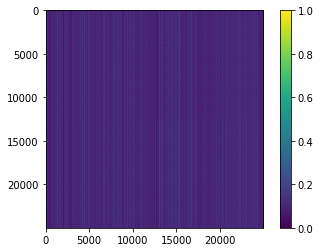

In [7]:
# Plotting a continuous heatmap
plt.imshow(cosine_matrix, cmap='viridis')
plt.colorbar()

**Question 6)​ ​(15 points)​** Write a function that takes a cosine similarity matrix as input and returns a list with the top n document paris and their similarity. Note that you should only keep the document pairs that are unique and remove the comparisons of the document to itself. Print the top 50 similar document pairs. Compare the assigned class for each document and answer: Do all similar documents belong to the same class? Why or why not?

In [11]:
def top_n(cosine_matrix,n):
  # converting all elements in lower triangular matrix to -1, so that same document is not cosidered twice (once in upper and once in lower)
  # converting all diagonal elements to -1, so similarity between document and itself is not calculated
  for i in range(len(cosine_matrix)):
    for j in range(len(cosine_matrix[0])):
      if(i>=j):
        cosine_matrix[i][j] = -1
  
  index = cosine_matrix.flatten().argsort()[-(n):] # gives index of top 50 values in 1D array
  x_cordinates, y_cordinates = np.unravel_index(index, cosine_matrix.shape) # gives list of x and y coordinates
  
  top_n_similar = [] # list consists of top 50 similar documents
  for x,y in zip(x_cordinates,y_cordinates):
    top_n_similar.append((list_of_documents[x],list_of_documents[y],cosine_matrix[x,y]))
  
  top_n_similar.reverse() # converting the list to descending order
  return top_n_similar 

In [12]:
top_50_similar = top_n(cosine_matrix,50)

In [16]:
top_50_similar

[('10330_1.txt', '279_1.txt', 1.0000004),
 ('5583_4.txt', '2716_4.txt', 1.0000004),
 ('4102_4.txt', '985_4.txt', 1.0000002),
 ('4983_2.txt', '7869_2.txt', 1.0000002),
 ('5550_4.txt', '5952_4.txt', 1.0000002),
 ('9319_8.txt', '6069_8.txt', 1.0000002),
 ('11974_4.txt', '5952_4.txt', 1.0000002),
 ('9664_10.txt', '3315_10.txt', 1.0000002),
 ('8278_10.txt', '8273_10.txt', 1.0000002),
 ('10329_1.txt', '278_1.txt', 1.0000002),
 ('5550_4.txt', '11974_4.txt', 1.0000002),
 ('996_9.txt', '995_9.txt', 1.0000002),
 ('972_9.txt', '973_9.txt', 1.0000002),
 ('3704_3.txt', '3705_3.txt', 1.0000001),
 ('5580_2.txt', '2713_2.txt', 1.0000001),
 ('7871_2.txt', '4985_2.txt', 1.0000001),
 ('4986_2.txt', '7872_2.txt', 1.0000001),
 ('8371_10.txt', '8370_10.txt', 1.0000001),
 ('11469_10.txt', '11470_10.txt', 1.0000001),
 ('5984_4.txt', '5983_4.txt', 1.0000001),
 ('6645_1.txt', '5088_1.txt', 1.0000001),
 ('11922_10.txt', '11923_10.txt', 1.0000001),
 ('4104_4.txt', '987_4.txt', 1.0000001),
 ('7729_7.txt', '7728_7.

In [ ]:
# calculating if similar documents belog to similar class
same_class = 0
different_class = 0
for pair in top_50_similar:
  print(list_of_documents.index(pair[0]),list_of_documents.index(pair[1]))
  if((list_of_documents.index(pair[0]) < len(positive_data) and list_of_documents.index(pair[1]) < len(positive_data)) or
     (list_of_documents.index(pair[0]) > len(positive_data) and list_of_documents.index(pair[1]) > len(positive_data))):
    same_class += 1
  else:
    different_class += 1

In [18]:
print('Number of similar pairs with same class are ',same_class,' and number of similar pairs with different class are ', different_class)

Number of similar pairs with same class are  50  and number of similar pairs with different class are  0


The cosine similarity has provided very good results and as expected the similarity score between documents of same class are higher than the similarity scores between documents of different class.

According to the above metrics all similiar documents belong to same class. This is because our cosine similarity is able to capture the difference between positive and negative reviews. Since the cosine similarity depends on TFIDF, the model is able to differentiate between keywords present in both the classes. 



**Question 7)​ ​(20 points)​** Using Spacy’s part of speech tagger, process all sentences (hint: don’t forget to split the reviews) and count how many NOUN and VERB tags are found in all the movies review (TRAINING folder) separating them by label. In other words, how many NOUN and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found in negative reviews. ​Answer the following question: When comparing both, do you see any differences? Why do you think about the differences? Or lack of them.

In [17]:
# loading spacy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
noun_count_positive_reviews = 0
verb_count_positive_reviews = 0
punct_count_positive_reviews = 0

noun_count_negative_reviews = 0
verb_count_negative_reviews = 0
punct_count_negative_reviews = 0

punct_dict = {}

for review in positive_data:
  doc = nlp(review)

  for d in doc:
    if(d.pos_ == 'NOUN'):
      noun_count_positive_reviews += 1
    elif(d.pos_ == 'VERB'):
      verb_count_positive_reviews += 1
    elif(d.pos_ == 'PUNCT'):
      if(d.text in punct_dict):
        punct_dict[d.text] += 1
      else:
        punct_dict[d.text] = 1
      punct_count_positive_reviews += 1
      

for review in negative_data:
  doc = nlp(review)

  for d in doc:
    if(d.pos_ == 'NOUN'):
      noun_count_negative_reviews += 1
    elif(d.pos_ == 'VERB'):
      verb_count_negative_reviews += 1
    elif(d.pos_ == 'PUNCT'):
      if(d.text in punct_dict):
        punct_dict[d.text] += 1
      else:
        punct_dict[d.text] = 1
      punct_count_negative_reviews += 1


In [45]:
print('Number of Noun tags in Positive reviews are ',noun_count_positive_reviews,' and number of Verb tags in Positive reviews are ',verb_count_positive_reviews)
print('Number of Noun tags in Negative reviews are ',noun_count_negative_reviews,' and number of Verb tags in Negative reviews are ',verb_count_negative_reviews)

Number of Noun tags in Positive reviews are  542978  and number of Verb tags in Positive reviews are  342125
Number of Noun tags in Negative reviews are  528475  and number of Verb tags in Negative reviews are  355559


The number of words in Negative reviews are more than the number of words in Positive reviews. This shows that reviewers usually use more verbs to express their dissatisfaction when compared to senario where they are satisfied with a product. 

Similarly, number of nouns used are more in positve reviews when compared to negative ones. 

On the other hand, we can also see that the number of Nouns are greater than the number of verbs in reviews. 

In [40]:
print(len(punct_dict.keys()))

6972


**Question 8)​ ​(20 points)​** Using the results from the PoS process in question 7, count how many different PUNCT tags are found and their respective counts from the full dataset provided (both negative and positives together). Using regex, write a set of regular expressions that generate the same counts from the dataset without using NLTK or Spacy, just regex. ​Can you get the same counts? If not, why do you think this is?

In [50]:
print('Using spacy the number of different PUNCT tags found are: ', len(punct_dict.keys()))
print('Different PUNCT tags and their respective counts are as follows: ', punct_dict)

Using spacy the number of different PUNCT tags found are:  6972
Different PUNCT tags and their respective counts are as follows:  {',': 275296, '--': 4046, '.': 236532, '"': 63328, '!': 21913, '?': 14797, '-': 47563, '(': 33106, ')': 32850, '/>But': 818, ';': 6521, '/><br': 7171, '/>PS': 25, ':': 9396, '/>They': 102, '/>Simply': 13, '/>Oscar': 2, '/>First': 180, '/>Neal': 1, '/>Are': 11, '...': 9726, '/>Both': 39, '/>While': 248, '/>That': 237, '.....': 314, '/>William': 16, '/>The': 6996, '/>Nice': 11, '/>This': 1993, '....': 1148, 'himself.<br': 2, '/>All': 406, '/>After': 185, '/>Watch': 82, '/>A': 279, '/>Ray': 3, '/>If': 918, '/>Allen': 7, '/>Toni': 2, '......': 125, '/>Recommend': 2, 'around.<br': 26, '/>At': 198, '/>Anyway': 161, 'drama.<br': 6, '/>Well': 193, '/>10/10': 32, "'": 14119, '/>There': 974, '/>but': 15, '/>xx': 2, 'acted.<br': 5, '/>One': 337, '/>Overall': 313, '/>Did': 25, "/>I'm": 244, '/>"Dangerous': 1, '/>Perhaps': 74, '/>It': 1590, '/>Try': 13, '/>Had': 12, '/>P

In [58]:
punct_dict_re = {}

for doc in positive_data:
  temp = re.findall("[^\w\s]",doc)
  for p in temp:
    if(p in punct_dict_re):
      punct_dict_re[p] += 1
    else:
      punct_dict_re[p] = 1

for doc in negative_data:
  temp = re.findall("[^\w\s]",doc)
  for p in temp:
    if(p in punct_dict_re):
      punct_dict_re[p] += 1
    else:
      punct_dict_re[p] = 1

In [61]:
print('Number of punctuations according to regex are: ', len(punct_dict_re.keys()))
print('List of punctuations according to regex are as follows: \n',punct_dict_re)

Number of punctuations according to regex are:  66
List of punctuations according to regex are as follows: 
 {',': 276280, '-': 67075, "'": 133857, '.': 327192, '"': 65831, '!': 24560, '?': 16088, '(': 35397, ')': 36175, '<': 101971, '/': 108798, '>': 102036, ';': 6702, ':': 10192, '\x96': 1368, '\x97': 283, '&': 3809, '*': 7061, '{': 106, '}': 107, '@': 82, '#': 377, '%': 446, '`': 964, '$': 782, '+': 295, '=': 427, '®': 4, '´': 205, '£': 56, '^': 37, '~': 115, '₤': 2, '\x84': 19, '[': 100, ']': 107, '«': 18, '»': 20, '\\': 17, '“': 29, '”': 27, '’': 125, '\x08': 4, '\x91': 71, '·': 14, '\x8e': 18, '\x9e': 18, '¨': 52, '\x9a': 1, '¡': 39, '–': 81, '…': 5, '|': 16, '¿': 3, '¤': 1, '\x80': 2, '°': 1, '‘': 7, '¦': 14, '§': 13, '\xad': 1, '\x95': 14, '\x8d': 1, '¢': 1, '\x10': 1, '\uf0b7': 7}


The count of punctuations obtained from spacy are very high when compared to the counts obtained using regex. Spacy is considering part of string as a different punctuation, for example, '/>But' and '/>They' considered as a different punctuations. Due to this the number of punctuations are very high in spacy. 

But Regex will perform a pattern based match and will include only punctuations without part of word. Because of which the number of punctuations according regex are 66 whereas the number of punctuations according to spacy are 6972.

**Bonus Question:​ ​(40 points)​** Using the code from Class 09 - Word Embeddings, pre-tune BERT in order to classify movie reviews. You can use the full TRAINING folder for the tuning and use the UNLABELED folder for your final classification/prediction task. Do the label predictions from BERT match what your classifier from Question 4 predicted? If they don’t, are they better? Please say why. 

​NOTE: This is a pro-level task and while you might be tempted to copy code from the Internet, do not do it, as you will fail the class if you are plagiarizing. The code from the class can be tweaked to do the task with some adjustments. This is definitely not easy, but that is why it is worth an extra 40 points!

In [6]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [7]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [8]:
!pip install transformers

In [9]:
sentences = X
labels = y

In [10]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


# NOTE: Since bert has a constraint of 512 tokens, I am adding max_length as 512

In [12]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation = True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  The "movie aimed at adults" is a rare thing these days, but Moonstruck does it well, and is still a better than average movie, which is aging very well. Although it's comic moments aim lower than the rest of it, the movie has a wonderful specificity (Italians in Brooklyn) that isn't used to shortchange the characters or the viewers. (i.e. Mobsters never appear in acomplication. It never becomes grotesque like My Big Fat Greek Wedding) The secondary story lines are economically told with short scenes that allow a break from the major thread. These are the scenes that are now missing in contemporary movies where their immediate value cannot be impressed upon producers and bigwigs. I miss these scenes. It also beautifully involves older characters. The movie takes it's own slight, quiet path to a conclusion. There isn't a poorly written scene included anywhere to make some executives sphincter relax. Cage and Cher do very nice work.<br /><br />Moonstruck invokes old-school, eth

In [13]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

22,500 training samples
2,500 validation samples


In [14]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 8

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

# NOTE: Changed the batch size to 8, to handle cuda out of memory exception


Loading and Training the model

In [15]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [16]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [17]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [18]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [19]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [20]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))



======== Epoch 1 / 4 ========
Training...
  Batch    40  of  2,813.    Elapsed: 0:00:33.
  Batch    80  of  2,813.    Elapsed: 0:01:07.
  Batch   120  of  2,813.    Elapsed: 0:01:40.


KeyboardInterrupt: ignored

# NOTE: Stopped the training in between because it is taking 4 Hours to train on Reviews dataset.

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Evaluation on Test Data

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')